## Кредитный скоринг и прогнозирование просрочек по кредитам с использованием методов машинного обучения

Постановка задачи: Разработка и оптимизация моделей машинного обучения для предсказания вероятности просрочек по кредитам клиентов банка

In [ ]:
import pandas as pd

In [ ]:
!wget  -O 'credit_scoring.csv' -q 'https://www.dropbox.com/scl/fi/5v1ora94vmn46i961ujha/credit_scoring.csv?rlkey=y34fmgqme1e73ca0qbvjpgh9x&dl=0'

Признаки клиентов банка:

- client_id - ID клиента (неотрицательное целое число)
- Age - возраст (вещественный)
- Income - месячный доход (вещественный)
- BalanceToCreditLimit - отношение баланса на кредитной карте к лимту по кредиту (вещественный)
- DIR - Debt-to-income Ratio (вещественный)
- NumLoans - число заемов и кредитных линий
- NumRealEstateLoans - число ипотек и заемов, связанных с недвижимостью (натуральное число)
- NumDependents - число членов семьи, которых содержит клиент, исключая самого клиента (натуральное число)
- Num30-59Delinquencies - число просрочек выплат по кредиту от 30 до 59 дней (натуральное число)
- Num60-89Delinquencies - число просрочек выплат по кредиту от 60 до 89 дней (натуральное число)
- Delinquent90 - Таргет, были ли просрочки выплат по кредиту более 90 дней (бинарный)


In [ ]:
df = pd.read_csv("credit_scoring.csv")
df

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
0,0,0.496289,49.1,13,0,0.0,2,0,5298.360639,0.387028,0
1,1,0.433567,48.0,9,2,2.0,1,0,6008.056256,0.234679,0
2,2,2206.731199,55.5,21,1,NaN,1,0,NaN,0.348227,0
3,3,886.132793,55.3,3,0,0.0,0,0,NaN,0.971930,0
4,4,0.000000,52.3,1,0,0.0,0,0,2504.613105,1.004350,0
...,...,...,...,...,...,...,...,...,...,...,...
74995,74995,0.169463,67.6,5,1,0.0,0,0,20129.654428,0.074689,0
74996,74996,2085.662215,43.2,1,1,0.0,0,0,NaN,1.005390,0
74997,74997,0.118935,23.0,4,0,0.0,2,0,2019.117329,0.384511,0
74998,74998,0.203414,46.3,14,2,0.0,0,0,16823.909642,0.524093,0


In [ ]:
df['Delinquent90'].value_counts()

0    69987
1     5013
Name: Delinquent90, dtype: int64

In [ ]:
x = df.drop(['Delinquent90'], axis=1)
y = df['Delinquent90']

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              75000 non-null  int64  
 1   DIR                    75000 non-null  float64
 2   Age                    75000 non-null  float64
 3   NumLoans               75000 non-null  int64  
 4   NumRealEstateLoans     75000 non-null  int64  
 5   NumDependents          73084 non-null  float64
 6   Num30-59Delinquencies  75000 non-null  int64  
 7   Num60-89Delinquencies  75000 non-null  int64  
 8   Income                 60153 non-null  float64
 9   BalanceToCreditLimit   75000 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 5.7 MB


In [ ]:
x

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit
0,0,0.496289,49.1,13,0,0.0,2,0,5298.360639,0.387028
1,1,0.433567,48.0,9,2,2.0,1,0,6008.056256,0.234679
2,2,2206.731199,55.5,21,1,NaN,1,0,NaN,0.348227
3,3,886.132793,55.3,3,0,0.0,0,0,NaN,0.971930
4,4,0.000000,52.3,1,0,0.0,0,0,2504.613105,1.004350
...,...,...,...,...,...,...,...,...,...,...
74995,74995,0.169463,67.6,5,1,0.0,0,0,20129.654428,0.074689
74996,74996,2085.662215,43.2,1,1,0.0,0,0,NaN,1.005390
74997,74997,0.118935,23.0,4,0,0.0,2,0,2019.117329,0.384511
74998,74998,0.203414,46.3,14,2,0.0,0,0,16823.909642,0.524093


 Далее обучена модель дерева решений максимальной глубины.
 Перед этим предобработали данные (заполнение пропусков).
 Также данные разделены на обучающие и тестовые.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

##**Разделим данные на тренировочные и тестовые:**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 3, stratify = y)

##**Проверим распределение целевых значений. Видно, что в данных преобладают нули.**

In [ ]:
ytrain.value_counts()

0    55990
1     4010
Name: Delinquent90, dtype: int64

In [ ]:
ytest.value_counts()

0    13997
1     1003
Name: Delinquent90, dtype: int64

##**Сделаем пайплайн для DecisionTreeClassifier. Для обработки пропусков используем SimpleImputer со стандартными настройками - пропуски заполняются средним значением в колонке:**

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 3, random_state = 3)

In [ ]:
pipe = make_pipeline(SimpleImputer(), dtc)

In [ ]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=3))])

##**Проверим качество модели. Видно, что модель хорошо определяет класс 0, но плохо работает с классом 1. Сказывается неравномерное распределение классов в исходном датасете:**

In [ ]:
y_predicted = pipe.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(ytest, y_predicted, output_dict = True)

{'0': {'precision': 0.9368788611334945,
  'recall': 0.9967850253625777,
  'f1-score': 0.9659039772923951,
  'support': 13997},
 '1': {'precision': 0.5833333333333334,
  'recall': 0.06281156530408774,
  'f1-score': 0.11341134113411341,
  'support': 1003},
 'accuracy': 0.9343333333333333,
 'macro avg': {'precision': 0.7601060972334139,
  'recall': 0.5297982953333328,
  'f1-score': 0.5396576592132543,
  'support': 15000},
 'weighted avg': {'precision': 0.9132384501745904,
  'recall': 0.9343333333333333,
  'f1-score': 0.9089006363546113,
  'support': 15000}}

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(ytest, y_predicted).ravel()

In [ ]:
print(f'tn = {tn}, fp = {fp}, fn = {fn}, tp = {tp}')

tn = 13952, fp = 45, fn = 940, tp = 63


Визуализация решающего дерева

[Text(0.5, 0.875, 'Num60-89Delinquencies <= 0.5\ngini = 0.125\nsamples = 60000\nvalue = [55990, 4010]\nclass = y[0]'),
 Text(0.25, 0.625, 'BalanceToCreditLimit <= 0.704\ngini = 0.096\nsamples = 56864\nvalue = [53992, 2872]\nclass = y[0]'),
 Text(0.125, 0.375, 'Num30-59Delinquencies <= 0.5\ngini = 0.056\nsamples = 46634\nvalue = [45285, 1349]\nclass = y[0]'),
 Text(0.0625, 0.125, 'gini = 0.04\nsamples = 41501\nvalue = [40645, 856]\nclass = y[0]'),
 Text(0.1875, 0.125, 'gini = 0.174\nsamples = 5133\nvalue = [4640, 493]\nclass = y[0]'),
 Text(0.375, 0.375, 'Num30-59Delinquencies <= 0.5\ngini = 0.253\nsamples = 10230\nvalue = [8707, 1523]\nclass = y[0]'),
 Text(0.3125, 0.125, 'gini = 0.186\nsamples = 7638\nvalue = [6845, 793]\nclass = y[0]'),
 Text(0.4375, 0.125, 'gini = 0.405\nsamples = 2592\nvalue = [1862, 730]\nclass = y[0]'),
 Text(0.75, 0.625, 'BalanceToCreditLimit <= 0.742\ngini = 0.462\nsamples = 3136\nvalue = [1998, 1138]\nclass = y[0]'),
 Text(0.625, 0.375, 'Num60-89Delinquencies 

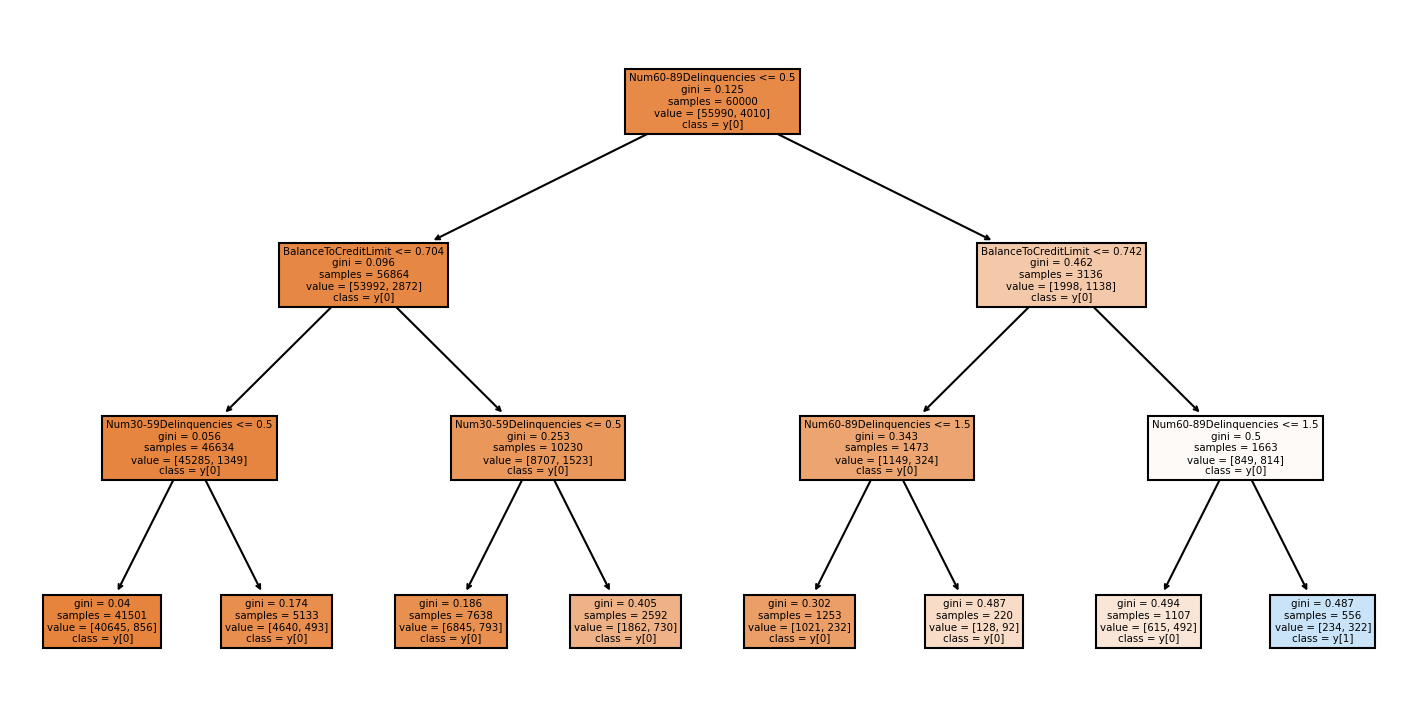

In [ ]:
plt.figure(figsize = (12, 6), dpi = 150)
plot_tree(dtc, filled = True, feature_names = xtrain.columns,
          class_names = True)

##**Проверим изменения значений основных метрик в зависимости от глубины дерева. В библиотеке scikit-learn есть две метрики, которые хорошо работают с несбалансированными данными: F1-score и Balanced Accuracy. Видно, что качество F1 score и Balanced accuracy скачет после глубины дерева = 6. Это говорит о возможном переобучении модели:**

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, balanced_accuracy_score, recall_score

## **f1 score (macro):**

In [ ]:
for depth in range(1, 12):
  dtc = DecisionTreeClassifier(max_depth = depth, random_state = 3)
  pipe = make_pipeline(SimpleImputer(), dtc)
  pipe.fit(xtrain, ytrain)
  y_predicted = pipe.predict(xtest)
  print(f'f1_score = {f1_score(ytest, y_predicted, average = "macro")} for depth = {depth}')

f1_score = 0.482705107424906 for depth = 1
f1_score = 0.482705107424906 for depth = 2
f1_score = 0.5396576592132543 for depth = 3
f1_score = 0.559951888073096 for depth = 4
f1_score = 0.5694772181694615 for depth = 5
f1_score = 0.5706269790521812 for depth = 6
f1_score = 0.5688160765623813 for depth = 7
f1_score = 0.5740350006205784 for depth = 8
f1_score = 0.5801617646484489 for depth = 9
f1_score = 0.5755186475174352 for depth = 10
f1_score = 0.5818076204761695 for depth = 11


##**Balanced Accuracy:**

In [ ]:
for depth in range(1, 12):
  dtc = DecisionTreeClassifier(max_depth = depth, random_state = 3)
  pipe = make_pipeline(SimpleImputer(), dtc)
  pipe.fit(xtrain, ytrain)
  y_predicted = pipe.predict(xtest)
  print(f'balanced_accuracy_score = {balanced_accuracy_score(ytest, y_predicted)} for depth = {depth}')

balanced_accuracy_score = 0.5 for depth = 1
balanced_accuracy_score = 0.5 for depth = 2
balanced_accuracy_score = 0.5297982953333328 for depth = 3
balanced_accuracy_score = 0.5420449731750665 for depth = 4
balanced_accuracy_score = 0.5483453191187315 for depth = 5
balanced_accuracy_score = 0.5489867113669351 for depth = 6
balanced_accuracy_score = 0.5482722725586191 for depth = 7
balanced_accuracy_score = 0.5519030890467841 for depth = 8
balanced_accuracy_score = 0.5572746645396383 for depth = 9
balanced_accuracy_score = 0.5550273876520043 for depth = 10
balanced_accuracy_score = 0.5606847386681849 for depth = 11


##**Подготовим список параметров для оптимизации модели. GridSearchCV по умолчанию использует 5-кратную кросс-валидацию:**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
param_grid = {
    "decisiontreeclassifier__criterion": ('gini', 'entropy'),
    "decisiontreeclassifier__splitter": ('best', 'random'),
    "decisiontreeclassifier__max_depth": np.arange(3, 5, 1),
    "decisiontreeclassifier__min_samples_split": [2, 3, 4],
    "decisiontreeclassifier__min_samples_leaf": [1, 2, 3, 4],
    "decisiontreeclassifier__class_weight": ['balanced'],
    "decisiontreeclassifier__max_features": ['sqrt'],
    "decisiontreeclassifier__random_state": [3],
    "simpleimputer__strategy": ['mean', 'median']
}

In [ ]:
search = GridSearchCV(pipe, param_grid, n_jobs=-1,
                      verbose = 2,
                      scoring = 'f1_macro')

In [ ]:
from sklearn.metrics import get_scorer_names

In [ ]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

##**Найдём лучшие параметры:**

In [ ]:
search.fit(xtrain, ytrain)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(max_depth=11,
                                                               random_state=3))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__class_weight': ['balanced'],
                         'decisiontreeclassifier__criterion': ('gini',
                                                               'entropy'),
                         'decisiontreeclassifier__max_depth': array([3, 4]),
                         'decisiontreeclassifier__max_features': ['sqrt'],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 3,
                                                                      4],
                         'decisiontreeclassifier__min_samples_split': [2, 3, 4],
                         'decisiontreeclassifier__random_state': [3],
                         'decisiontreeclassifier__splitter': ('best', 'random'),
                         'simpleimputer__strategy': ['mean', 'median']},
             scoring='f1_macro', verbose=2)

In [ ]:
search.best_score_

0.5690272413377908

In [ ]:
search.best_params_

{'decisiontreeclassifier__class_weight': 'balanced',
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__max_features': 'sqrt',
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__random_state': 3,
 'decisiontreeclassifier__splitter': 'best',
 'simpleimputer__strategy': 'mean'}

1.5 Визуализируйте лучшее решающее дерево


In [ ]:
dtc = DecisionTreeClassifier(class_weight = 'balanced', criterion = 'entropy',
                             max_depth = 3, max_features = 'sqrt', min_samples_leaf = 1,
                             min_samples_split = 2, splitter = 'best',
                             random_state = 3)
pipe = make_pipeline(SimpleImputer(strategy = 'mean'), dtc)
pipe.fit(xtrain, ytrain)
y_predicted_dtc = pipe.predict(xtest)
classification_report(ytest, y_predicted_dtc, output_dict = True)

{'0': {'precision': 0.9744897959183674,
  'recall': 0.7368721868971922,
  'f1-score': 0.839184736178349,
  'support': 13997},
 '1': {'precision': 0.1659873188405797,
  'recall': 0.7308075772681955,
  'f1-score': 0.2705296180107031,
  'support': 1003},
 'accuracy': 0.7364666666666667,
 'macro avg': {'precision': 0.5702385573794735,
  'recall': 0.7338398820826939,
  'f1-score': 0.5548571770945261,
  'support': 15000},
 'weighted avg': {'precision': 0.9204279302844327,
  'recall': 0.7364666666666667,
  'f1-score': 0.8011606639435391,
  'support': 15000}}

In [ ]:
tn, fp, fn, tp = confusion_matrix(ytest, y_predicted_dtc).ravel()
print(f'tn = {tn}, fp = {fp}, fn = {fn}, tp = {tp}')

tn = 10314, fp = 3683, fn = 270, tp = 733


[Text(0.5, 0.875, 'BalanceToCreditLimit <= 0.495\nentropy = 1.0\nsamples = 60000\nvalue = [30000.0, 30000.0]\nclass = y[0]'),
 Text(0.25, 0.625, 'NumRealEstateLoans <= 3.5\nentropy = 0.864\nsamples = 43313\nvalue = [22559.743, 9044.888]\nclass = y[0]'),
 Text(0.125, 0.375, 'Age <= 60.25\nentropy = 0.85\nsamples = 42219\nvalue = [22019.111, 8408.978]\nclass = y[0]'),
 Text(0.0625, 0.125, 'entropy = 0.907\nsamples = 26606\nvalue = [13785.319, 6568.579]\nclass = y[0]'),
 Text(0.1875, 0.125, 'entropy = 0.686\nsamples = 15613\nvalue = [8233.792, 1840.399]\nclass = y[0]'),
 Text(0.375, 0.375, 'Age <= 35.65\nentropy = 0.995\nsamples = 1094\nvalue = [540.632, 635.91]\nclass = y[1]'),
 Text(0.3125, 0.125, 'entropy = 0.665\nsamples = 55\nvalue = [21.968, 104.738]\nclass = y[1]'),
 Text(0.4375, 0.125, 'entropy = 1.0\nsamples = 1039\nvalue = [518.664, 531.172]\nclass = y[1]'),
 Text(0.75, 0.625, 'BalanceToCreditLimit <= 0.864\nentropy = 0.83\nsamples = 16687\nvalue = [7440.257, 20955.112]\nclass =

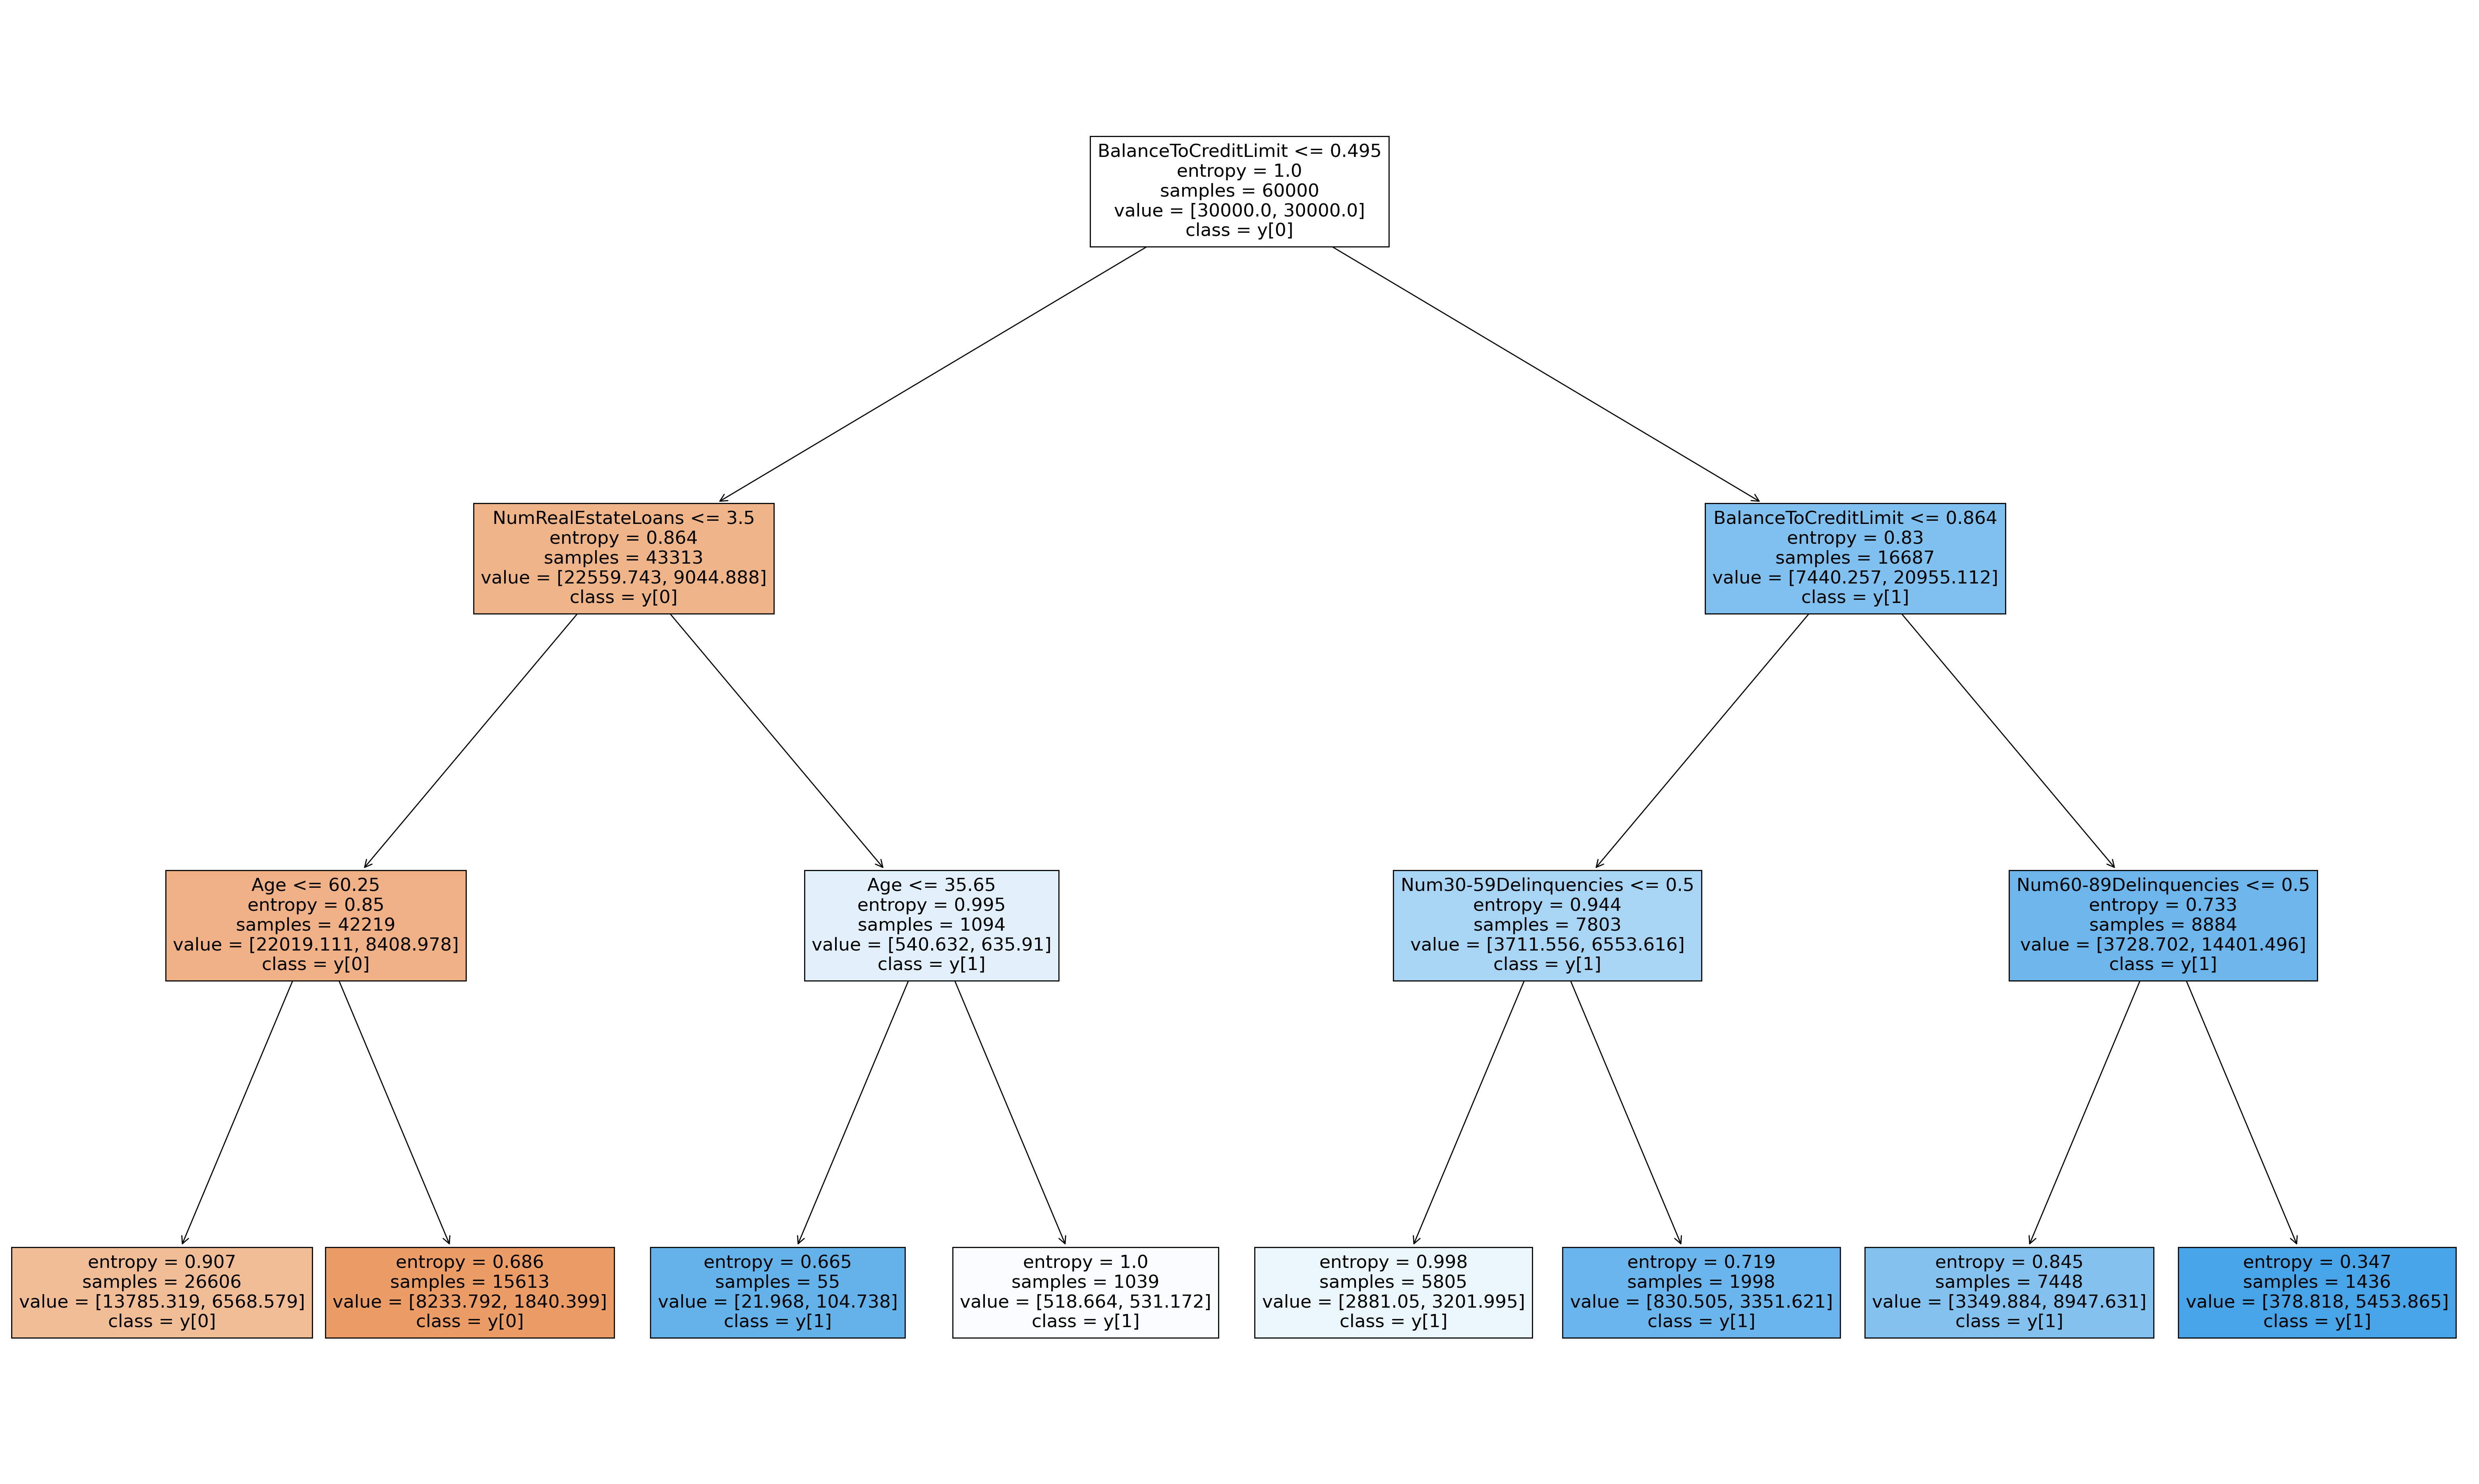

In [ ]:
plt.figure(figsize = (40, 24), dpi = 200)
plot_tree(dtc, filled = True, feature_names = xtrain.columns,
          class_names = True)

##**Настроим RandomForestClassifier аналогично настройке DecisionTreeClassifier:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
pipe_rfc = make_pipeline(SimpleImputer(), rfc)

In [ ]:
param_grid_rfc = {
    "randomforestclassifier__criterion": ('gini', 'entropy'),
    "randomforestclassifier__max_depth": [3, 4, 5],
    "randomforestclassifier__min_samples_split": [2, 3],
    "randomforestclassifier__min_samples_leaf": [1, 2, 3],
    "randomforestclassifier__class_weight": ['balanced'],
    "randomforestclassifier__n_estimators": [75],
    "randomforestclassifier__bootstrap": [True],
    "randomforestclassifier__max_features": ['sqrt'],
    "randomforestclassifier__max_samples": [0.1],
    "randomforestclassifier__random_state": [3],
    "simpleimputer__strategy": ['mean', 'median']
}

In [ ]:
search_rfc = GridSearchCV(pipe_rfc, param_grid_rfc, n_jobs=-1,
                      verbose = 3,
                      scoring = 'f1_macro')

In [ ]:
search_rfc.fit(xtrain, ytrain)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__bootstrap': [True],
                         'randomforestclassifier__class_weight': ['balanced'],
                         'randomforestclassifier__criterion': ('gini',
                                                               'entropy'),
                         'randomforestclassifier__max_depth': [3, 4, 5],
                         'randomforestclassifier__max_features': ['sqrt'],
                         'randomforestclassifier__max_samples': [0.1],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 3],
                         'randomforestclassifier__min_samples_split': [2, 3],
                         'randomforestclassifier__n_estimators': [75],
                         'randomforestclassifier__random_state': [3],
                         'simpleimputer__strategy': ['mean', 'median']},
             scoring='f1_macro', verbose=3)

In [ ]:
search_rfc.best_score_

0.6017513993593273

In [ ]:
search_rfc.best_params_

{'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__class_weight': 'balanced',
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': 5,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_samples': 0.1,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 3,
 'randomforestclassifier__n_estimators': 75,
 'randomforestclassifier__random_state': 3,
 'simpleimputer__strategy': 'median'}

In [ ]:
rfc = RandomForestClassifier(class_weight = 'balanced', criterion = 'gini',
                             max_depth = 5, min_samples_leaf = 1,
                             max_samples = 0.1,
                             min_samples_split = 3, n_estimators = 75, random_state = 3)
pipe_rfc = make_pipeline(SimpleImputer(strategy = 'median'), rfc)
pipe_rfc.fit(xtrain, ytrain)
y_predicted_rfc = pipe_rfc.predict(xtest)
classification_report(ytest, y_predicted_rfc, output_dict = True)

{'0': {'precision': 0.9758741258741259,
  'recall': 0.797599485604058,
  'f1-score': 0.8777764673507097,
  'support': 13997},
 '1': {'precision': 0.2042134831460674,
  'recall': 0.7248255234297108,
  'f1-score': 0.31865001095770323,
  'support': 1003},
 'accuracy': 0.7927333333333333,
 'macro avg': {'precision': 0.5900438045100966,
  'recall': 0.7612125045168845,
  'f1-score': 0.5982132391542064,
  'support': 15000},
 'weighted avg': {'precision': 0.9242757508970431,
  'recall': 0.7927333333333333,
  'f1-score': 0.840389544966564,
  'support': 15000}}

In [ ]:
tn, fp, fn, tp = confusion_matrix(ytest, y_predicted_rfc).ravel()
print(f'tn = {tn}, fp = {fp}, fn = {fn}, tp = {tp}')

tn = 11164, fp = 2833, fn = 276, tp = 727


Посмотрим, как настроенный случайный лес оценивает важность признаков по их влиянию на целевой признак.


In [ ]:
feature_importance_df = pd.DataFrame(data = rfc.feature_importances_, index = x.columns, columns= ['importance'])

In [ ]:
feature_importance_df.sort_values(by = 'importance', ascending = False)

,importance
BalanceToCreditLimit,0.422959
Num30-59Delinquencies,0.236416
Num60-89Delinquencies,0.133002
Age,0.062550
Income,0.039453
NumLoans,0.035393
DIR,0.027709
NumRealEstateLoans,0.018708
client_id,0.018228
NumDependents,0.005583


In [ ]:
classification_report(ytest, y_predicted_dtc, output_dict = True)

{'0': {'precision': 0.9744897959183674,
  'recall': 0.7368721868971922,
  'f1-score': 0.839184736178349,
  'support': 13997},
 '1': {'precision': 0.1659873188405797,
  'recall': 0.7308075772681955,
  'f1-score': 0.2705296180107031,
  'support': 1003},
 'accuracy': 0.7364666666666667,
 'macro avg': {'precision': 0.5702385573794735,
  'recall': 0.7338398820826939,
  'f1-score': 0.5548571770945261,
  'support': 15000},
 'weighted avg': {'precision': 0.9204279302844327,
  'recall': 0.7364666666666667,
  'f1-score': 0.8011606639435391,
  'support': 15000}}

In [ ]:
classification_report(ytest, y_predicted_rfc, output_dict = True)

{'0': {'precision': 0.9758741258741259,
  'recall': 0.797599485604058,
  'f1-score': 0.8777764673507097,
  'support': 13997},
 '1': {'precision': 0.2042134831460674,
  'recall': 0.7248255234297108,
  'f1-score': 0.31865001095770323,
  'support': 1003},
 'accuracy': 0.7927333333333333,
 'macro avg': {'precision': 0.5900438045100966,
  'recall': 0.7612125045168845,
  'f1-score': 0.5982132391542064,
  'support': 15000},
 'weighted avg': {'precision': 0.9242757508970431,
  'recall': 0.7927333333333333,
  'f1-score': 0.840389544966564,
  'support': 15000}}

##**Оценим качество модели с помощью метрики Balanced Accuracy, которая подходит для несбалансированных данных и показывает среднее значение правильно найденных классов из их общего числа: $\frac{1}{2}\left( \frac{TP}{TP + FN} + \frac{TN}{TN + FP}\right )$. Видно, что модель Random Forest имеет большую точность: разница = 0.0274.**

In [ ]:
comparison = {'decision tree classifier': balanced_accuracy_score(ytest, y_predicted_dtc),
              'random forest classifier': balanced_accuracy_score(ytest, y_predicted_rfc)}
print(f'balanced accuracy score for classifiers: {comparison}')

balanced accuracy score for classifiers: {'decision tree classifier': 0.7338398820826939, 'random forest classifier': 0.7612125045168845}


##**Построим Confusion Matrix для более детальной оценки качества распределения классов. Видно, что модель Random Forest допускает меньше ошибок: False Positive классов на 850 меньше. Остальные классы отличаются незначительно.**

In [ ]:
tn, fp, fn, tp = confusion_matrix(ytest, y_predicted_dtc).ravel()
print(f'decision tree classifier: tn = {tn}, fp = {fp}, fn = {fn}, tp = {tp}')

decision tree classifier: tn = 10314, fp = 3683, fn = 270, tp = 733


In [ ]:
tn, fp, fn, tp = confusion_matrix(ytest, y_predicted_rfc).ravel()
print(f'random forest classifier: tn = {tn}, fp = {fp}, fn = {fn}, tp = {tp}')

random forest classifier: tn = 11164, fp = 2833, fn = 276, tp = 727


# 2 Бустинг xgboost

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [ ]:
!wget  -O 'telecom_churn.csv' -q 'https://www.dropbox.com/scl/fi/t8ickc6qfwdtfx6v40crd/telecom_churn.csv?rlkey=i7slagusqlb9pvsqdzvwac0x1&dl=0'

In [ ]:
df_telecom = pd.read_csv("telecom_churn.csv")
df_telecom

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Так как XGBoost поддерживает только числовые признаки. Поэтому текстовые признаки требуют предобработки

Занумеровали Штаты, а признаки International plan (наличие международного роуминга), Voice mail plan (наличие голосовой почтыы) и целевой Churn сделать бинарными.




In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

##**Обработаем данные с помощью OrdinalEncoder, чтобы преобразовать текстовые признаки в числовые:**

In [ ]:
OrdinalEncoder().fit_transform(df_telecom)

array([[ 16., 126.,   1., ...,  79.,   1.,   0.],
       [ 35., 105.,   1., ..., 116.,   1.,   0.],
       [ 31., 135.,   1., ..., 101.,   0.,   0.],
       ...,
       [ 39.,  26.,   2., ..., 120.,   2.,   0.],
       [  6., 182.,   2., ...,  29.,   2.,   0.],
       [ 42.,  72.,   1., ..., 116.,   0.,   0.]])

In [ ]:
df_telecom_encoded = pd.DataFrame(data = OrdinalEncoder().fit_transform(df_telecom), columns = df_telecom.columns)

Разделим данные на обучающую и тестовую выборки в отношении 7:3.

In [ ]:
x = df_telecom_encoded.drop('Churn', axis = 1)
y = df_telecom_encoded['Churn']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7, stratify = y, random_state = 3)

Инициализируем параметры и обучим классификатор xgboost

In [ ]:
classifier = XGBClassifier(n_estimators = 1000, early_stopping_rounds = 50,
                             learning_rate = 0.01, max_depth = 4, subsample = 0.5, eta = 0.1)

Получени прогнозов

In [ ]:
classifier.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xtest, ytest)], verbose=100)

[0]	validation_0-logloss:0.41851	validation_1-logloss:0.41895
[100]	validation_0-logloss:0.24199	validation_1-logloss:0.24950
[200]	validation_0-logloss:0.18527	validation_1-logloss:0.19576
[300]	validation_0-logloss:0.16151	validation_1-logloss:0.17716
[400]	validation_0-logloss:0.14573	validation_1-logloss:0.16724
[500]	validation_0-logloss:0.13424	validation_1-logloss:0.16216
[600]	validation_0-logloss:0.12448	validation_1-logloss:0.15932
[700]	validation_0-logloss:0.11542	validation_1-logloss:0.15720
[800]	validation_0-logloss:0.10782	validation_1-logloss:0.15572
[825]	validation_0-logloss:0.10592	validation_1-logloss:0.15569


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=50,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_predicted_xgb = classifier.predict(xtest)

In [ ]:
classification_report(ytest, y_predicted_xgb, output_dict = True)

{'0.0': {'precision': 0.9614512471655329,
  'recall': 0.991812865497076,
  'f1-score': 0.9763960852043754,
  'support': 855},
 '1.0': {'precision': 0.940677966101695,
  'recall': 0.7655172413793103,
  'f1-score': 0.844106463878327,
  'support': 145},
 'accuracy': 0.959,
 'macro avg': {'precision': 0.9510646066336139,
  'recall': 0.8786650534381932,
  'f1-score': 0.9102512745413511,
  'support': 1000},
 'weighted avg': {'precision': 0.9584391214112763,
  'recall': 0.959,
  'f1-score': 0.9572140901120983,
  'support': 1000}}

In [ ]:
tn, fp, fn, tp = confusion_matrix(ytest, y_predicted_xgb).ravel()
print(f'tn = {tn}, fp = {fp}, fn = {fn}, tp = {tp}')

tn = 848, fp = 7, fn = 34, tp = 111


In [ ]:
print(f'Доля правильных ответов алгоритма на тестовой выборке: {accuracy_score(ytest, y_predicted_xgb)}')

Доля правильных ответов алгоритма на тестовой выборке: 0.959


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

In [ ]:
sns.set_theme(style = 'darkgrid')

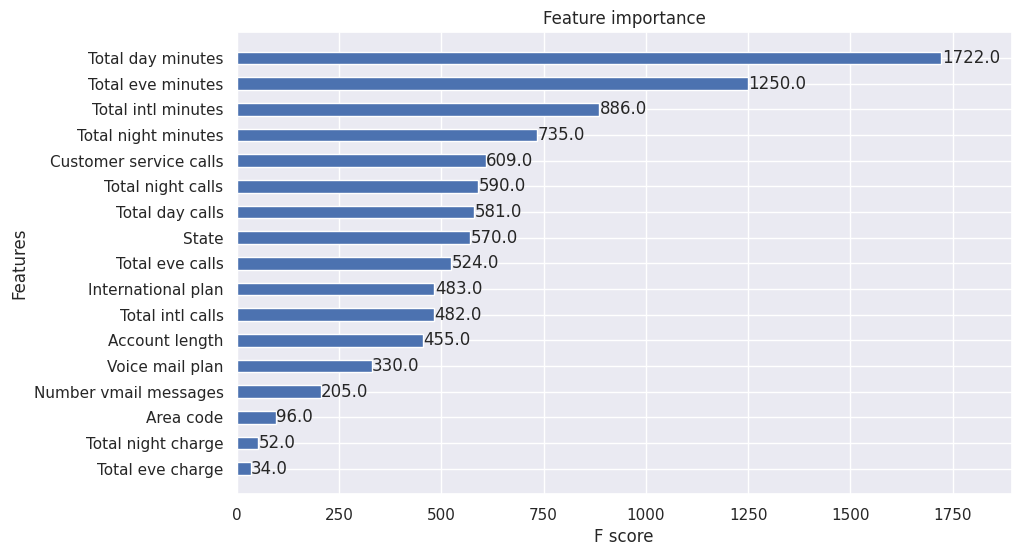

In [ ]:
ax = plot_importance(classifier, height = 0.5)
ax.figure.set_size_inches(10, 6)

Сравнение моделей показало, что модель случайного леса имеет лучшую точность по метрике Balanced Accuracy.